In [1]:
# The main difference between CNN and RNN is the ability to process temporal
# information-data that comes in sequences. Recurrent neural networks are
# designed for this very purpose, while convolutional neural networks are 
# incapable of effectively interpreting temporal information. 
# Examples of RNN
# 1. Google translate
# 2. Auto-correct and auto-fill
# 3. Name recognition
# 4. Sentiment analysis

In [2]:
# An algorithm that constantly updates itself according to the input
# to provide an ever changing output. 

In [3]:
# Back propogation algorithm in feed forward models
# 1. Take the derivative(gradient) of the loss with respect to each parameter.
# 2. Shift parameters in order to minimize loss.

In [4]:
# In standard RNN, repeating modules contain a simple computation node.
# LSTM's (Long short term memory) contain interacting layers that control information flow.
# LSTM cells are able to track information through many timesteps. (Single timestep functions)
# LSTM's selectively update cell state values
# Information is added or removed to cell state through structures called gates.
# Gates optionally let information through, via a sigmoid(value of 0 or 1) neural net layer and pointwise multiplication
# Sigmoid values of 0 or 1 equal to "completely forget"(0), or "completely keep"(1)
# LSTM's forget irrelevant parts of the previous state (sigmoid values of 0)
# An output gate is used to output certain parts of the cell state (sigmoid values of 1)
# How do they work?
# 1. Forget
# 2. Update
# 3. Output

In [5]:
# Sentiment analysis
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Embedding, LSTM
from tensorflow.python.keras.preprocessing.text import Tokenizer
#from tensorflow.python.keras.optimizers import Adam
from keras.layers import Dropout
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.models import load_model
from sklearn.model_selection import train_test_split
import re
import nltk
nltk.download("stopwords")
nltk.download("punkt")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
import warnings
warnings.filterwarnings("ignore") # stops warnings as in above 

In [7]:
data = pd.read_csv("IMDB Dataset.csv")

In [8]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [9]:
data["review"][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [10]:
data.columns

Index(['review', 'sentiment'], dtype='object')

In [11]:
data.shape

(50000, 2)

In [12]:
data.info()  # Find info that can maybe hinder analysis(null values, etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [13]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


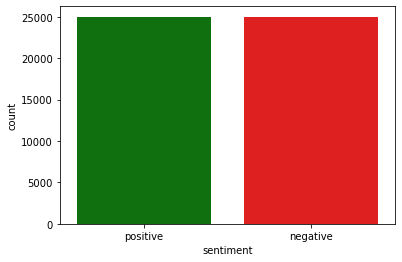

In [14]:
# Plot the sentiments counts
sns.countplot(data["sentiment"], palette = ["green", "red"])
plt.show()

In [15]:
print(data.sentiment.value_counts())

positive    25000
negative    25000
Name: sentiment, dtype: int64


In [16]:
# Convert labels to integers or binary classes ---> 0 and 1
data.sentiment = [1 if each == "positive" else 0 for each in data.sentiment]

In [17]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [18]:
# Text processing
WPT = nltk.WordPunctTokenizer()

In [19]:
stop_word_list = nltk.corpus.stopwords.words("english")

In [20]:
stop_word_list # These words add no value in any form of context

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
data["review"] = data["review"].apply(lambda x: re.sub("[,\.!?/:()""]", "", x))
# Removes the irrelevant symbols and replace it with a blank space(cleaning it up)

In [22]:
data["review"] = data["review"].apply(lambda x: re.sub('[^a-zA-Z"]', " ", x))
# Removes anything that is not alphabetic

In [23]:
data["review"] = data["review"].apply(lambda x: x.lower())
# Replace all capitals to lowercase

In [24]:
data["review"][0]

'one of the other reviewers has mentioned that after watching just   oz episode you ll be hooked they are right as this is exactly what happened with me br   br  the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word br   br  it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far away br   br  i would say the main appeal of the show is due to the fact that it goes where other shows wo

In [25]:
data["review"] = data["review"].apply(lambda x: x.strip())

In [26]:
data["review"][0]

'one of the other reviewers has mentioned that after watching just   oz episode you ll be hooked they are right as this is exactly what happened with me br   br  the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word br   br  it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far away br   br  i would say the main appeal of the show is due to the fact that it goes where other shows wo

In [27]:
# Method to remove stop words
def token(values):
    words = nltk.tokenize.word_tokenize(values)
    filtered_words = [word for word in words if word not in set(stop_word_list)]  #LOL
    not_stopword_doc = " ".join(filtered_words)
    return not_stopword_doc

In [28]:
token("it is great") # Above function removes words that are in the stop_word_list

'great'

In [29]:
def token(values):
    words = nltk.tokenize.word_tokenize(values)
    print(words)  # Shows how function works
    filtered_words = [word for word in words if word not in set(stop_word_list)]  #LOL
    print(filtered_words)  # Shows how function works
    not_stopword_doc = " ".join(filtered_words)
    return not_stopword_doc


##  data["review"] = data["review"].apply (lambda x: token(x))

In [30]:
token("it is great") # Removes "it" and "is" from the end result because they are stop_words

['it', 'is', 'great']
['great']


'great'

In [31]:
# converting labels to an array
sentiment = data["sentiment"].values
sentiment

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [32]:
data_ = data["review"] # Create a new dataset

In [33]:
# Splitting the data(train and test)
x_train, x_test, y_train, y_test = train_test_split(data_, sentiment, test_size = .2, random_state = 1904)

In [34]:
# Create an index
tokenizer = Tokenizer(num_words = 15000)
tokenizer.fit_on_texts(data_)

In [35]:
x_train_tokens = tokenizer.texts_to_sequences(x_train)

In [36]:
x_test_tokens = tokenizer.texts_to_sequences(x_test)

In [37]:
x_train_tokens[0] # Converted dictionary words to an index value(each number represents a word in the text)

[1,
 8013,
 2,
 1,
 5461,
 6,
 3,
 898,
 467,
 4,
 35,
 1068,
 13,
 20,
 137,
 108,
 78,
 106,
 4,
 1,
 2022,
 9,
 784,
 3229,
 2346,
 11,
 20,
 6,
 1034,
 2346,
 40,
 13,
 163,
 3106,
 41,
 1134,
 41,
 7828,
 44,
 8,
 8,
 6186,
 107,
 898,
 365,
 4546,
 8829,
 2,
 1868,
 3581,
 15,
 10597,
 348,
 1432,
 11524,
 2,
 870,
 5675,
 8829,
 3581,
 2,
 819,
 3732,
 70,
 3,
 4,
 406,
 13,
 153,
 36,
 32,
 575,
 2746,
 5,
 74,
 1883,
 2,
 128,
 180,
 32,
 2677,
 9,
 14066,
 137,
 3581,
 2,
 3732,
 13,
 4647,
 8829,
 47,
 76,
 2277,
 1498,
 44,
 2,
 12,
 13,
 3,
 856,
 162,
 8829,
 6,
 1,
 87,
 4,
 1,
 5,
 1219,
 35,
 775,
 16,
 727,
 215,
 9,
 1812,
 80,
 9,
 19,
 10,
 103,
 27,
 239,
 9,
 11,
 17,
 6,
 60,
 52,
 1379,
 7,
 7,
 8829,
 64,
 2408,
 1,
 1111,
 2385,
 297,
 9,
 27,
 105,
 1316,
 11524,
 3,
 1193,
 362,
 1360,
 1316,
 47,
 3,
 112,
 732,
 626,
 18,
 27,
 330,
 72,
 254,
 34,
 1,
 82,
 105,
 284,
 3250,
 1,
 131,
 116,
 1316,
 4622,
 1,
 5460,
 27,
 330,
 191,
 25,
 216,
 195,
 1498

In [38]:
x_test_tokens[0]

[163,
 81,
 124,
 339,
 9375,
 18,
 1,
 1287,
 5629,
 15,
 3,
 8958,
 19,
 2521,
 23,
 182,
 15,
 77,
 15,
 10,
 841,
 16,
 3,
 1169,
 12985,
 42,
 94,
 249,
 5,
 104,
 8,
 137,
 1945,
 41,
 7191,
 41,
 137,
 262,
 5,
 142,
 5,
 1645,
 1,
 6465,
 418,
 675,
 536,
 8,
 32,
 3,
 533,
 4,
 651,
 1732,
 153,
 22,
 35,
 912,
 116,
 3,
 1260,
 2911,
 5,
 2064,
 1300,
 47,
 768,
 358,
 1300,
 2074,
 12,
 377,
 84,
 2854,
 18,
 1,
 28,
 595,
 122,
 1,
 912,
 2,
 4113,
 293,
 37,
 149,
 1,
 1260,
 6,
 6454,
 5,
 2250,
 56,
 1,
 912,
 2997,
 4,
 1,
 80,
 110,
 40,
 1,
 115,
 6,
 1731,
 2653,
 261,
 3,
 784,
 203,
 45,
 4,
 1,
 1052,
 5811,
 226,
 202,
 19,
 11,
 6,
 770,
 4,
 11,
 240,
 4,
 91,
 16,
 1884,
 5561,
 1,
 1550,
 2074,
 26,
 226,
 642,
 473,
 63,
 797,
 21,
 120,
 21,
 151,
 148,
 1039,
 1758,
 194,
 107,
 4,
 1,
 11832,
 9,
 1,
 533,
 26,
 54,
 1013,
 2,
 275,
 148,
 15,
 33,
 487,
 130,
 2,
 40,
 9,
 67,
 2484,
 121,
 5514,
 21,
 42,
 181,
 5,
 1921,
 93,
 56]

In [39]:
# Take the word count of each sentence in our corpus and create a list
num_tokens = [len(tokens) for tokens in x_train_tokens + x_test_tokens]
num_tokens = np.array(num_tokens)
num_tokens

array([366, 122, 310, ..., 251, 132, 135])

In [40]:
np.mean(num_tokens)

228.79692

In [41]:
# Set the number of tokens by taking into account the variability
max_tokens = np.mean(num_tokens) +2*np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

566

In [42]:
# How many reviews can we cover if the max sentence size is 566
np.sum(num_tokens < max_tokens) / len(num_tokens)

0.9451

In [43]:
# Adjusting the data
x_train_pad = pad_sequences(x_train_tokens, maxlen = max_tokens)

In [44]:
len(x_train_pad[1])

566

In [45]:
x_test_pad = pad_sequences(x_test_tokens, maxlen = max_tokens)

In [46]:
len(x_test_pad[1])

566

In [47]:
x_train_pad.shape

(40000, 566)

In [48]:
x_test_pad.shape

(10000, 566)

In [49]:
# Create in index of the dictionary in numerical order
idx = tokenizer.word_index
idx

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'it': 8,
 'in': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 's': 13,
 'was': 14,
 'as': 15,
 'for': 16,
 'movie': 17,
 'with': 18,
 'but': 19,
 'film': 20,
 'you': 21,
 'on': 22,
 't': 23,
 'not': 24,
 'he': 25,
 'are': 26,
 'his': 27,
 'have': 28,
 'be': 29,
 'one': 30,
 'at': 31,
 'all': 32,
 'they': 33,
 'by': 34,
 'an': 35,
 'who': 36,
 'so': 37,
 'from': 38,
 'like': 39,
 'there': 40,
 'or': 41,
 'just': 42,
 'her': 43,
 'about': 44,
 'out': 45,
 'if': 46,
 'has': 47,
 'what': 48,
 'some': 49,
 'good': 50,
 'can': 51,
 'more': 52,
 'when': 53,
 'very': 54,
 'she': 55,
 'up': 56,
 'no': 57,
 'time': 58,
 'my': 59,
 'even': 60,
 'would': 61,
 'only': 62,
 'which': 63,
 'really': 64,
 'story': 65,
 'see': 66,
 'their': 67,
 'had': 68,
 'me': 69,
 'were': 70,
 'we': 71,
 'well': 72,
 'than': 73,
 'much': 74,
 'get': 75,
 'been': 76,
 'bad': 77,
 'other': 78,
 'do': 79,
 'people': 80,
 'will': 81,
 'great': 82,
 'also'

In [50]:
# Reverse the index
inverse_map = dict(zip(idx.values(), idx.keys()))
inverse_map

{1: 'the',
 2: 'and',
 3: 'a',
 4: 'of',
 5: 'to',
 6: 'is',
 7: 'br',
 8: 'it',
 9: 'in',
 10: 'i',
 11: 'this',
 12: 'that',
 13: 's',
 14: 'was',
 15: 'as',
 16: 'for',
 17: 'movie',
 18: 'with',
 19: 'but',
 20: 'film',
 21: 'you',
 22: 'on',
 23: 't',
 24: 'not',
 25: 'he',
 26: 'are',
 27: 'his',
 28: 'have',
 29: 'be',
 30: 'one',
 31: 'at',
 32: 'all',
 33: 'they',
 34: 'by',
 35: 'an',
 36: 'who',
 37: 'so',
 38: 'from',
 39: 'like',
 40: 'there',
 41: 'or',
 42: 'just',
 43: 'her',
 44: 'about',
 45: 'out',
 46: 'if',
 47: 'has',
 48: 'what',
 49: 'some',
 50: 'good',
 51: 'can',
 52: 'more',
 53: 'when',
 54: 'very',
 55: 'she',
 56: 'up',
 57: 'no',
 58: 'time',
 59: 'my',
 60: 'even',
 61: 'would',
 62: 'only',
 63: 'which',
 64: 'really',
 65: 'story',
 66: 'see',
 67: 'their',
 68: 'had',
 69: 'me',
 70: 'were',
 71: 'we',
 72: 'well',
 73: 'than',
 74: 'much',
 75: 'get',
 76: 'been',
 77: 'bad',
 78: 'other',
 79: 'do',
 80: 'people',
 81: 'will',
 82: 'great',
 83: 'a

In [51]:
# Method to reverse index to sentence(numbers back to sentences)
def return_to_sentence(tokens):
    words = [inverse_map[token] for token in tokens if token != 0]
    text = " ".join(words)
    return text

In [52]:
return_to_sentence(x_train_pad[0])

'the falcon and the snowman is a superb example of an anti s film while many other films of the decade in general lacked substance this film is pure substance there s nothing stylish or fake or superfluous about it it boasts two superb performances timothy hutton and sean penn as lifelong friends christopher boyce and lee respectively hutton penn and tom cruise were a of early s actors who all looked headed to much bigger and better things all starred in taps while penn and cruise s popularity hutton has been largely forgotten about and that s a shame actually hutton is the first of the to win an oscar for supporting role in ordinary people in but i think his performance in this movie is even more outstanding br br hutton really captures the post vietnam war in his character chris boyce a failed school student chris has a love hate relationship with his father well played by the great character actor pat the scene where chris quotes the poem his father thought he d long forgotten is a 

In [53]:
len(x_train_pad[2])

566

In [74]:
# Creating and modeling the RNN/LSTM network
model = Sequential()

In [75]:
embedding_size = 50

In [76]:
model.add(Embedding(input_dim = 15000, output_dim = embedding_size, input_length = max_tokens,
                   name = "embedding_layer"))

In [77]:
model.add(LSTM(units = 16, return_sequences = True))
model.add(Dropout(0.1))

In [78]:
model.add(LSTM(units = 8, return_sequences = True))
model.add(Dropout(0.2))

In [79]:
model.add(LSTM(units = 4))
model.add(Dropout(0.1))

In [80]:
model.add(Dense(1, activation = 'sigmoid'))

In [81]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [82]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 566, 50)           750000    
_________________________________________________________________
lstm_6 (LSTM)                (None, 566, 16)           4288      
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 566, 16)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 566, 8)            800       
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 566, 8)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 4)                 208       
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 4)                

In [83]:
# Fitting the data
history = model.fit(x_train_pad, y_train, validation_split = 0.3, epochs = 10, batch_size = 1000,
                   shuffle = True, verbose = 1)

Epoch 1/10
28/28 [==============================] - 203s 7s/step - loss: 0.6853 - accuracy: 0.5934 - val_loss: 0.6609 - val_accuracy: 0.6931
Epoch 2/10
28/28 [==============================] - 211s 8s/step - loss: 0.5950 - accuracy: 0.7686 - val_loss: 0.5359 - val_accuracy: 0.8354
Epoch 3/10
28/28 [==============================] - 222s 8s/step - loss: 0.4919 - accuracy: 0.8566 - val_loss: 0.4783 - val_accuracy: 0.8346
Epoch 4/10
28/28 [==============================] - 236s 8s/step - loss: 0.4165 - accuracy: 0.8899 - val_loss: 0.4285 - val_accuracy: 0.8544
Epoch 5/10
28/28 [==============================] - 255s 9s/step - loss: 0.3607 - accuracy: 0.9110 - val_loss: 0.3946 - val_accuracy: 0.8626
Epoch 6/10
28/28 [==============================] - 275s 10s/step - loss: 0.3115 - accuracy: 0.9270 - val_loss: 0.3716 - val_accuracy: 0.8658
Epoch 7/10
28/28 [==============================] - 297s 11s/step - loss: 0.2758 - accuracy: 0.9349 - val_loss: 0.3628 - val_accuracy: 0.8652
Epoch 8/10


In [84]:
result = model.evaluate(x_test_pad, y_test)  # Model performs fairly well 

313/313 [==============================] - 61s 189ms/step - loss: 0.3601 - accuracy: 0.8665


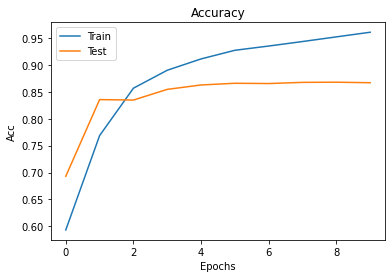

In [85]:
# Visualising the accuracy performance of the model
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("Epochs")
plt.legend()
plt.show()

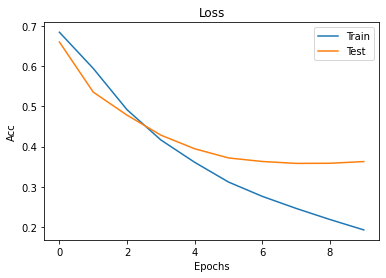

In [86]:
# Visualising the loss performance of the model
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("Epochs")
plt.legend()
plt.show()

Take Home Exercise
1. Implement early stopping
2. Create a function/class that will: Given an input sentence, preprocess it, convert it into vector form using the tokenizer, and predict the sentiment(0 or 1)
3. Embedding---count vectorizers, tf-idf, word2vec, GloVe, ULMFIT, BERT instead of doing inxes based embedding.

Example 1:
1."I am going to the bank to withdraw cash."
Example 2:
2. "I live by the river bank."
Finding out the sentiment of the word "bank" in both sentences.

In [87]:
# Like any other network, RNN's learn by comparing their prediction against the actual and backpropogating
# the losses to adjust weight.
# At each time step during the forward pass, based on the output produced, a loss is calculated by comparing the
# prediction against the actual. In other words, it learns as it goes.
# The loss at each time step is aggregated to obtain the total loss for the entire network. 
# Unlike ANN's(arificial neural networks), backpropogation in RNN's happens in chunks and is called
# truncated-backpropogation through time.
# This is nothing but an extension of classical backpropogation.
# The sequences are broken down into "n" chunks and forward and backward propogations are carried out instead
# of running through the entire sequence.
# The gradients are calculated only for the sub-sequence and the weights are adjusted. 
# For forward pass, the hidden state of previous sebsequence is passed on as input to the next subsequence
# However, in gradient computation, the computed gradient values are dropped at the end of every
# subsequence as we walk back
# Truncated backpropogation reduces the overall time taken for training the network and is light on memory.
# Drawbacks of RNN
# Though RNN's are preferred for modelling sequences, they typically run into problems related to gradient
# calculations called:
# 1. Exploding gradients
# 2. Vanishing gradients

In [ ]:
# Restricted Boltzmann Machine
# In RBM, all visible nodes are connected with all hidden nodes.

In [ ]:
# How RBM's work
# There are generally two steps involoved i the processing of RBM's.
# 1. Forward propogation
# 2. Back propogation
# Forward
# 1. At each hidden node,